1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [3]:
from scipy import stats
import math

#calcolo la probabilità che in un singolo anno vengano osservati 15 o più uragani
#sapendo che il numero medio di uragani è 6.3 e il numero di uragani osservati è 15
probability = 1 - stats.poisson.cdf(15, 6.3)

#calcolo lo Z score
z_score = (15 - 6.3 ) / math.sqrt(6.3)
#print(z_score)

#confronto il punteggio Z con il valore fornito
if z_score >= 3:
    print("There is a significant difference between the number of hurricanes in 2005 and the historic average.")
else:
    print("There is no significant difference between the number of hurricanes in 2005 and the historic average.")

There is a significant difference between the number of hurricanes in 2005 and the historic average.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [2]:
import numpy as np

#dati
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#calcolo delle statistiche necessarie per il test t di Student
n = len(pre)
mean_difference = np.mean(post) - np.mean(pre)
std_difference = np.sqrt(((n-1)*np.var(pre, ddof=1) + (n-1)*np.var(post, ddof=1)) / (2*n - 2))
t_statistic = mean_difference / (std_difference * np.sqrt(2/n))

#calcolo del p-value utilizzando la distribuzione t di Student
degrees_of_freedom = 2*n - 2
p_value = 2 * stats.t.cdf(-np.abs(t_statistic), df=degrees_of_freedom)

# Stampa dei risultati
print(f"t-statistic: {t_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

#se il valore di p è inferiore a un certo livello di significatività, possiamo affermare che 
#il cambiamento della pressione sanguigna all'interno del nostro campione è statisticamente significativo

t-statistic: 3.787
p-value: 0.001


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

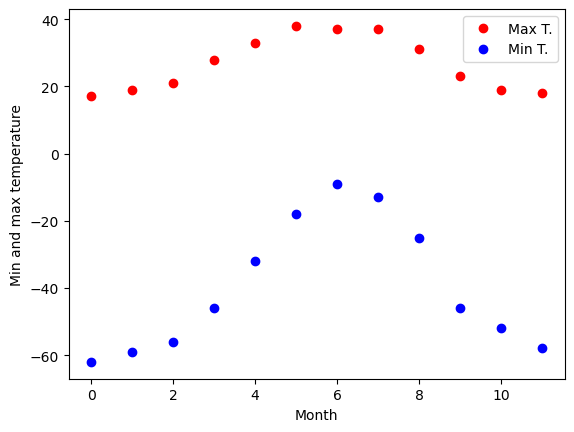

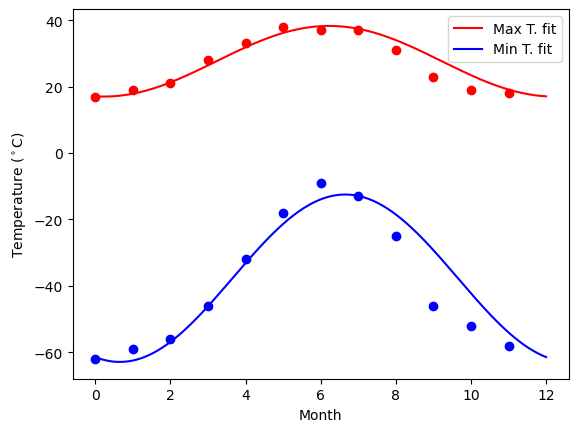

In [3]:
import matplotlib.pyplot as plt
from scipy import optimize

#DATI
temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]) #temp MAX
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]) #temp MIN
months = np.arange(12) #mesi


#------->1<-------
#plot delle temperature per ogni mese (MAX e MIN)
plt.plot(months, temp_max, 'ro', label="Max T.")
plt.plot(months, temp_min, 'bo', label="Min T.")
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.legend()


#------->2<-------
#fit the data
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))


#------->3<-------
res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])
 

#------->4<-------
#plot del fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-', label="Max T. fit")
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-', label="Min T. fit")
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

#Il fit è abbastanza ragionevole, guardando il grafico possiamo notare che il fit non si 
#discosta molto dai valori originali tranne per qualche caso particolare.

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

,residuals
0,1.100000
1,-1.950000
2,-7.200000
3,-4.150000
4,-6.590000
...,...
11126,-0.760000
11127,0.380000
11128,0.083333
11129,0.166667


Numbers of bins: 265.0
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.4142135623730951, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.4142135623730951, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.7320508075688772, 0.0, 0.0, 1.4142135623730951, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


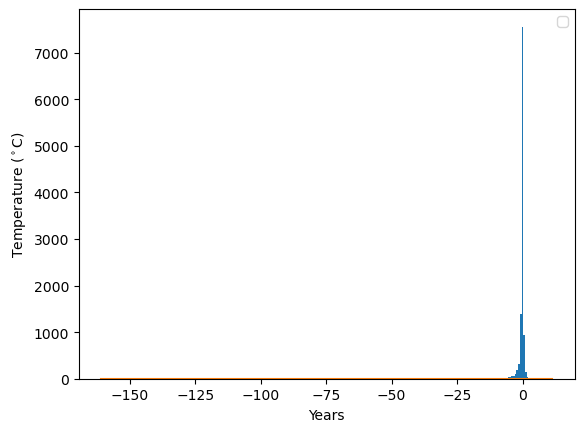

In [30]:
import pandas as pd
import math
import statistics
from scipy.optimize import curve_fit

#leggo il file pkl
data = np.load('data/residuals_261.pkl', allow_pickle=True).item()
df = pd.DataFrame(data) #converto in un dataframe di pandas

#tengo solo residuals
residuals = df[["residuals"]].copy()
display(residuals)

#------->1<-------
#binning
res_size = len(residuals)
sqrt_res_size = np.round(math.sqrt(res_size))

R = residuals["residuals"].max() - residuals["residuals"].min()
dev_std = statistics.stdev(residuals["residuals"])
bin = np.round(R*(res_size**(1/3))/(3.49*dev_std))
print(f"Numbers of bins: {bin}")

#numero di elementi per ogni bin
counts_b = residuals["residuals"].value_counts()
#print(counts)

#plot dell'istogramma
counts, bins = np.histogram(residuals["residuals"], bins=int(bin), range=(residuals["residuals"].min(), residuals["residuals"].max()))
plt.stairs(counts, bins, fill=True)
#plt.show()


#------->2<-------
sigma_values = []
for n in counts:
  sigma = math.sqrt(n)
  sigma_values.append(sigma)
print(sigma_values)

#sigma = np.sqrt(df['residuals'])



def f(x, a, b):
  return a * x + b

#params, cov = curve_fit(f, df['residuals'], 0, 3,sigma_values)



def gaussian(x, mu, sigma, A):
    return A*np.exp(-((x-mu)**2)/(2*sigma**2))

#fit con la funzione gaussiana
popt, pcov = curve_fit(gaussian, bins[:-1], n, p0=[0, 1, 1])
plt.plot(bins, gaussian(bins, *popt))
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()








5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

/tmp/ipykernel_403/3615373471.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  range_df = range_df[df[0]<2013]
/tmp/ipykernel_403/3615373471.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  range_df = range_df[np.abs(df[1])<70]


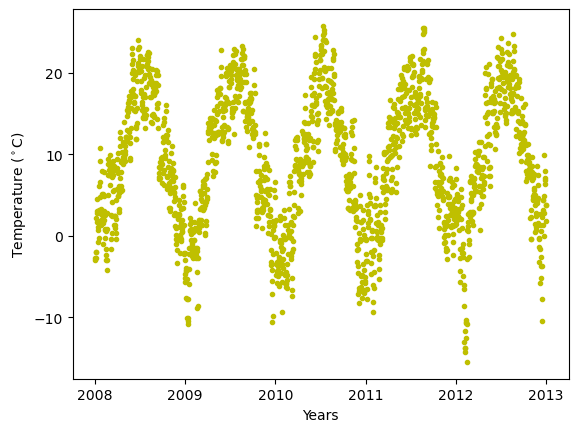

Theoric fit values (f function): a: 41.1666, b: 2.8, c: 9.25405114978069
Best fit values (f function): a: -9.997257067236585, b: 12.324439807163333, c: 9.253976707366688


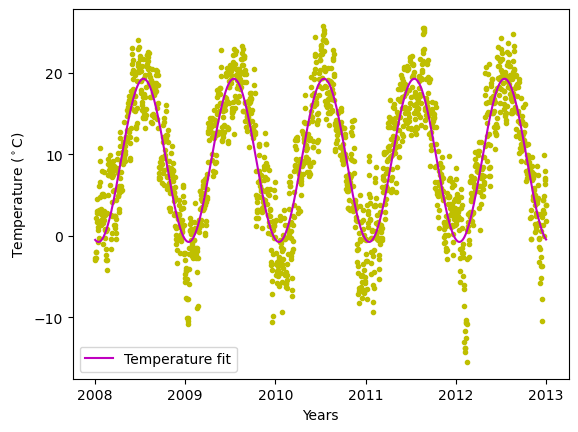

Average temperature in Munich: 9.25405114978069°C

Best fit values (g function): a: -10.001777816024969, b: 0.9990498222150643, c: 24.327771983257627, d: 9.244711364655451


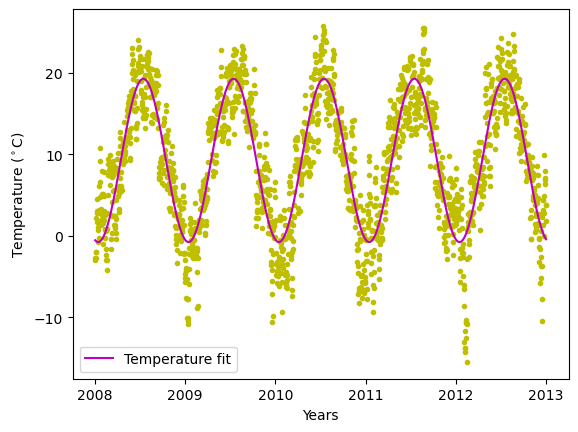

RSS of f(x): 24678.63391611245
RSS of f(x): 24672.37721974864


In [63]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/


import matplotlib.pyplot as plt
from scipy import optimize


#leggo il datset
data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
df = pd.DataFrame(data) #converto in un dataframe di pandas

#seleziono gli anni compresi tra il 2008 e il 2012
range_df = df[df[0]>=2008]
range_df = range_df[df[0]<2013]

#elimino eventuali dati errati
range_df = range_df[np.abs(df[1])<70]

#divido temperature e giorni
year = range_df[0].copy()
temp = range_df[1].copy()

#utilizzo array numpy
temp_np = temp.to_numpy()
months_np = year.to_numpy()


#------->1<-------
#plot delle temperature e relativo fit

#dati orginali
plt.plot(months_np, temp_np, 'y.')
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

#fit dei dati
def yearly_temps(t, a, b, c):
    return a * np.cos( 2 * np.pi * t + b) + c

#valori del fit teorici: 
a = range_df[1].max() - range_df[1].min() #ampiezza
b = 2.8 #valore arbitrario
c = range_df[1].mean() #valore medio
print(f"Theoric fit values (f function): a: {a}, b: {b}, c: {c}")

#ottimizazzione del fit e dei valori
res_max_f, cov_max = optimize.curve_fit(yearly_temps, months_np, temp_np)
print(f"Best fit values (f function): a: {res_max_f[0]}, b: {res_max_f[1]}, c: {res_max_f[2]}")

#plot del fit
plt.figure()
plt.plot(months_np, temp_np, 'y.')
plt.plot(months_np, yearly_temps(months_np, *res_max_f), 'm-', label="Temperature fit")
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

#temperatura media
print(f"Average temperature in Munich: {range_df[1].mean()}\u00b0C\n")

#------->media stagione calda e fredda????

#Il parametro b è una misura della velocità di variazione della temperatura in relazione al tempo.
#Dal punto di vista fisico, rappresenta la velocità con cui la temperatura cambia a seconda delle stagioni.


#------->2<-------
#plot delle temperature e relativo fit con g(x)

#fit dei dati
def yearly_temps_g(t, a, b, c, d):
    return a * np.cos( 2 * np.pi * t * b + c) + d

#ottimizazzione del fit e dei valori
res_max_g, cov_max = optimize.curve_fit(yearly_temps_g, months_np, temp_np)
print(f"Best fit values (g function): a: {res_max_g[0]}, b: {res_max_g[1]}, c: {res_max_g[2]}, d: {res_max_g[3]}")

#plot del fit
plt.figure()
plt.plot(months_np, temp_np, 'y.')
plt.plot(months_np, yearly_temps_g(months_np, *res_max_g), 'm-', label="Temperature fit")
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()



# Calcolare il residuo quadratico medio
residuals_f = temp_np - yearly_temps(months_np, *res_max_f)
rss_f = np.sum(residuals_f**2)
print(f"RSS of f(x): {rss_f}")

residuals_g = temp_np - yearly_temps_g(months_np, *res_max_g)
rss_g = np.sum(residuals_g**2)
print(f"RSS of f(x): {rss_g}")




"""""
from scipy.stats import chisquare

# Definire i dati
x_data = np.array([1995.00274, 1995.00548, ..., 2013.28200, 2013.28474])
y_data = np.array([0.944444, -1.61111, ..., 8.94444, 11.1667])

# Definire la funzione senza il parametro aggiunto
def f_no_param(t):
  return a * np.cos(2 * np.pi * b * t + c) + d

# Definire la funzione con il parametro aggiunto
def f_with_param(t, a, b, c, d, e):
  return a * np.cos(2 * np.pi * b * t + c) + d + e

# Ottenere i valori dei parametri ottimali
popt_no_param = curve_fit(f_no_param, x_data, y_data)[0]
popt_with_param = curve_fit(f_with_param, x_data, y_data)[0]

# Calcolare la statistica di devianza
chi2_no_param = chisquare(y_data, f_no_param(x_data, *popt_no_param))[0]
chi2_with_param = chisquare(y_data, f_with_param(x_data, *popt_with_param))[0]

# Calcolare il test di Fisher
f_test = (chi2_no_param - chi2_with_param) / (len(x_data) - len(popt_with_param))

if f_test > 0:
  print('Il parametro aggiunto è giustificato.')
else:
  print('Il parametro aggiunto non è giustificato.')"""
